In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("autos.csv")
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
name                 0
year                 0
selling_price        0
present_price    14527
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage           6921
engine            4942
max_power         4936
torque            4943
seats             4926
source               0
dtype: int64


In [5]:
columnas_deseadas = ["name", "year", "selling_price", "km_driven", "fuel", "seller_type", "transmission", "owner"]
df = df[columnas_deseadas]

print("\nColumnas que quedaron en el DataFrame:")
print(df.columns)

print("\nPrimeras filas del DataFrame limpio:")
print(df.head())


Columnas que quedaron en el DataFrame:
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Primeras filas del DataFrame limpio:
      name  year  selling_price  km_driven    fuel seller_type transmission  \
0     ritz  2014           3.35      27000  Petrol      Dealer       Manual   
1      sx4  2013           4.75      43000  Diesel      Dealer       Manual   
2     ciaz  2017           7.25       6900  Petrol      Dealer       Manual   
3  wagon r  2011           2.85       5200  Petrol      Dealer       Manual   
4    swift  2014           4.60      42450  Diesel      Dealer       Manual   

  owner  
0     0  
1     0  
2     0  
3     0  
4     0  


In [7]:
print("Valores únicos en 'owner':", df["owner"].unique())
df["owner"] = df["owner"].replace({
    '3': '4',
    '1': '2',
    '0': '1',
    'First Owner': '1',
    'Second Owner': '2',
    'Third Owner': '3',
    'First': '1',
    'Second': '2',
    'Third': '3',
    'Fourth': '4',
    '4 or More': '5',
    'Fourth & Above Owner': '5',
    'Test Drive Car': '0',
    'UnRegistered Car': '0'
})
df["owner"] = df["owner"].astype(int)

Valores únicos en 'owner': ['0' '1' '3' 'First Owner' 'Second Owner' 'Fourth & Above Owner'
 'Third Owner' 'Test Drive Car' 'First' 'Second' 'Third' 'Fourth'
 'UnRegistered Car' '4 or More']


In [9]:
df["brand"] = df["name"].apply(lambda x: x.split()[0])
df.drop("name", axis=1, inplace=True)

In [11]:
y = df["selling_price"]
X = df.drop(["selling_price", "fuel"], axis=1)

In [13]:
X = pd.get_dummies(X, columns=["brand", "seller_type", "transmission"], drop_first=True)

print("Columnas actuales en X:")
print(X.columns)

Columnas actuales en X:
Index(['year', 'km_driven', 'owner', 'brand_Activa', 'brand_Ambassador',
       'brand_Ashok', 'brand_Audi', 'brand_BMW', 'brand_Bajaj',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Ferrari',
       'brand_Fiat', 'brand_Force', 'brand_Ford', 'brand_Hero', 'brand_Honda',
       'brand_Hyosung', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar',
       'brand_Jeep', 'brand_KTM', 'brand_Kia', 'brand_Lamborghini',
       'brand_Land', 'brand_Lexus', 'brand_MG', 'brand_MINI', 'brand_Mahindra',
       'brand_Maruti', 'brand_Maserati', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_OpelCorsa',
       'brand_Peugeot', 'brand_Porsche', 'brand_Renault', 'brand_Rolls-Royce',
       'brand_Royal', 'brand_Skoda', 'brand_Ssangyong', 'brand_Suzuki',
       'brand_TVS', 'brand_Tata', 'brand_Toyota', 'brand_UM',
       'brand_Volkswagen', 'brand_Volvo', 'brand_Yamaha', 'brand_alto',
       'brand_amaze', 'brand_baleno', 'b

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

Tamaño de X_train: (11862, 89)
Tamaño de X_test: (2966, 89)


In [17]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 518054745378.1944
Coeficiente de Determinación (R²): 0.6636160820258582


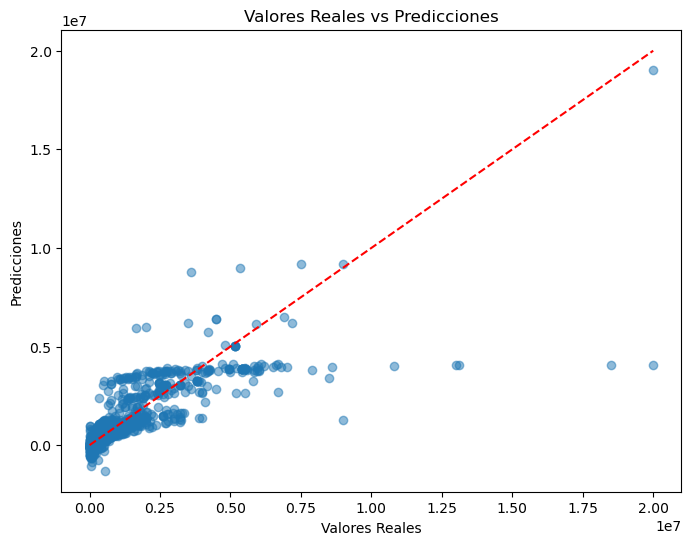

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [23]:
coeficientes = pd.DataFrame(modelo.coef_, index=X.columns, columns=["Coeficiente"])
print(coeficientes.sort_values(by="Coeficiente", key=abs, ascending=False))

                    Coeficiente
brand_Ferrari      3.364612e+07
brand_Lamborghini  2.277540e+07
brand_Rolls-Royce  1.808248e+07
brand_Porsche      7.700723e+06
brand_Land         5.001692e+06
...                         ...
owner             -3.059639e+03
km_driven         -5.636691e-01
brand_Maserati     5.836206e-03
brand_Suzuki      -2.239212e-03
brand_UM          -1.213566e-03

[89 rows x 1 columns]
